In [1]:
%matplotlib inline

import cPickle as pickle
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from w2v.w2v import *

In [2]:
original_model = model_from_saved("./models/corpus-original-w2v.mdl", binary=True)
substituted_model = model_from_saved("./models/corpus-substituted-w2v.mdl", binary=True)

corpus_original = pickle.load(open('corpus-original.pkl', 'rb'))
corpus_substituted = pickle.load(open('corpus-substituted.pkl', 'rb'))

In [3]:
substitute_key = pickle.load(open('substitute-key.pkl', 'rb'))
vocabs = pickle.load(open('vocabs-compared.pkl', 'rb'))

In [4]:
print(substitute_key)

{u'stake': u'credit', u'office': u'california', u'show': u'state', u'september': u'chicago', u'dollar': u'drop', u'trade': u'8', u'london': u'system', u'committee': u'home', u'japan': u'takeover', u'issues': u'association', u'cut': u'country', u'system': u'him', u'former': u'san', u'bush': u'dow', u'production': u'union', u'systems': u'point', u'treasury': u'index', u'policy': u'economic', u'8': u'foreign', u'street': u'bill', u'bonds': u'show', u'bid': u'monday', u'him': u'dollar', u'association': u'fiscal', u'notes': u'debt', u'drop': u'administration', u'she': u'funds', u'house': u'production', u'japanese': u'offering', u'computer': u'tax', u'home': u'west', u'insurance': u'traders', u'index': u'computer', u'monday': u'agency', u'chicago': u'rates', u'research': u'notes', u'state': u'fund', u'firms': u'former', u'issue': u'court', u'august': u'life', u'power': u'demand', u'city': u'my', u'friday': u'bid', u'takeover': u'volume', u'california': u'program', u'news': u'she', u'debt': u

In [5]:
def same_meaning(substituted, original, word, n):
    return len(same_meaning_words(substituted, original, word, n))


def same_meaning_words(substituted, original, word, n):
    similar_substituted = set((word[0]) for word in substituted.most_similar(word, topn=n))
    similar_original = set((word[0]) for word in original.most_similar(word, topn=n))
    intersection = similar_substituted & similar_original
    difference_substituted = set(similar_substituted) - set(similar_original)
    print('##present in substituted but not original\n')
    print(difference_substituted)
    difference_original = set(similar_original) - set(similar_substituted)
    print('\n##present in original but not substituted\n')
    print(difference_original)
    return intersection

def check_substitution(substituted_model, original_model, substituted_word, original_word, n):
    similar_substituted = set((word[0]) for word in substituted_model.most_similar(substituted_word, topn=n))
    similar_original = set((word[0]) for word in original_model.most_similar(original_word, topn=n))
    intersection = similar_substituted & similar_original
    return len(intersection)

In [6]:
check_substitution(substituted_model, original_model, 'credit', 'stake', 500)

385

In [7]:
check_substitution(substituted_model, original_model, 'credit', 'california', 500)

31

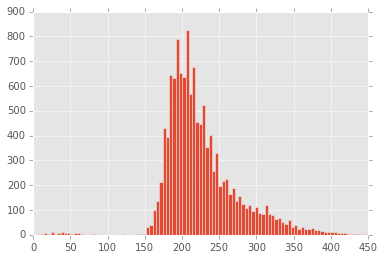

In [8]:
codewords = sorted(vocabs, key=vocabs.get)
positive = 0
false_positive = 0
count = 1
results = {}

for word in codewords:
    if word in substitute_key:
        positive += 1
    else:
        false_positive += 1
    results[count] = {'count': count, 'positive': positive, 'false_positive': false_positive, 'false_negative': len(substitute_key) - positive}
    count += 1

import pandas as pd
import matplotlib
import matplotlib.pyplot as plot
matplotlib.style.use('ggplot')

# distribution of comparison counts
plot.hist(vocabs.values(), bins=100)
plot.show()

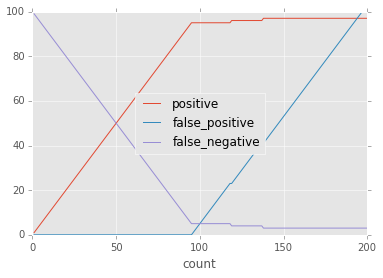

In [9]:
dataframe = pd.DataFrame.from_dict(results, orient='index')
dataframe.plot(x='count', y=['positive', 'false_positive', 'false_negative'], xlim=[0, 200], ylim=[0, 100])
plot.show()

In [12]:
codeword_count = len(substitute_key)

In [20]:
substitution_recovered = {}

for original_word in codewords[:codeword_count]:
    iter_count += 1
    
    max_count = 0
    max_substitute = ""
    for substitute_word in substitute_key.keys():
        
        count = check_substitution(substituted_model, original_model, substitute_word, original_word, 500)
        if(count > max_count):
            max_count = count
            max_substitute = substitute_word
    
    substitution_recovered[original_word] = max_substitute

print(substitution_recovered)

{u'precise': u'loans', u'stake': u'credit', u'office': u'california', u'show': u'state', u'september': u'chicago', u'dollar': u'drop', u'trade': u'8', u'london': u'system', u'committee': u'home', u'japan': u'takeover', u'issues': u'association', u'cut': u'country', u'system': u'him', u'analyst': u'wall', u'bush': u'dow', u'program': u'firms', u'systems': u'point', u'treasury': u'index', u'policy': u'economic', u'8': u'foreign', u'street': u'bill', u'bid': u'monday', u'him': u'dollar', u'association': u'fiscal', u'notes': u'debt', u'drop': u'administration', u'she': u'funds', u'house': u'production', u'japanese': u'offering', u'economic': u'oil', u'home': u'west', u'insurance': u'traders', u'index': u'computer', u'congress': u'her', u'chicago': u'rates', u'research': u'notes', u'state': u'fund', u'firms': u'former', u'dating': u'friday', u'issue': u'court', u'august': u'life', u'power': u'demand', u'friday': u'bid', u'takeover': u'volume', u'california': u'program', u'news': u'she', u'd

In [32]:
# precision = number of correct pairings out of constructed pairings

precision = 0
for original, substitute in substitution_recovered.iteritems():
    if original in substitute_key and substitute == substitute_key[original]:
        precision += 1

precision

95

In [34]:
# recall = number of correct pairings out of original pairings

recall = 0
for original, substitute in substitute_key.iteritems():
    if original in substitution_recovered and substitute == substitution_recovered[original]:
        recall += 1
        
recall

95